In [130]:
import matplotlib.pyplot as plt
import numpy as np
from SecondaryValue import SecondaryValue
from importlib import reload
import utility
reload(utility)
from utility import *
from scipy.optimize import curve_fit
import scipy.constants as const
%matplotlib qt5


In [2]:
e_cs_1 = (32.194*3.64 + 31.817*1.99)/(3.64+1.99)  # keV
e_ba_1 = (30.625*33.9 + 30.973*62.2)/(62.2 + 33.9)  # keV
e_ba_2 = (79.6142*2.65 + 80.9979*32.9)/(2.65 + 32.9)  # keV
e_ba_3 = 53.1622  # keV
e_am_1 = 26.3446  # keV
e_am_2 = 59.5409  # keV

e_eu_1 = (5.65*14 + 5.06*0.174)/(14+.174)
energies = [e_cs_1, e_ba_1, e_ba_2, e_ba_3, e_am_1, e_am_2, e_eu_1]


In [5]:
cal_cs = load_spectrum('../messung/cal/cs137.dat')
cal_ba = load_spectrum('../messung/cal/ba133.dat')
cal_am = load_spectrum('../messung/cal/am241.dat')
cal_eu = load_spectrum('../messung/cal/eu152.dat')

In [131]:
plot_spec(cal_eu, is_relative=True)[0].show()

In [132]:
p_cs_1, d_p_cs_1 = calibrate_peak(cal_cs, 310, 400)

In [70]:
p_ba_1, d_p_ba_1 = calibrate_peak(cal_ba, 260, 450)

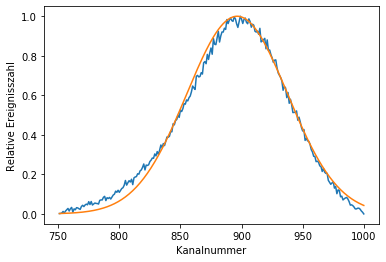

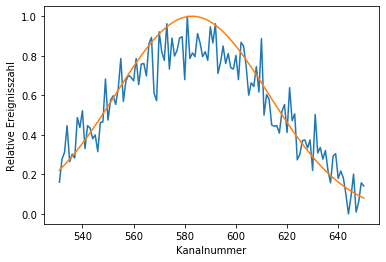

In [9]:
p_ba_2, d_p_ba_2 = calibrate_peak(cal_ba, 750, 1000)
p_ba_3, d_p_ba_3 = calibrate_peak(cal_ba, 530, 650)

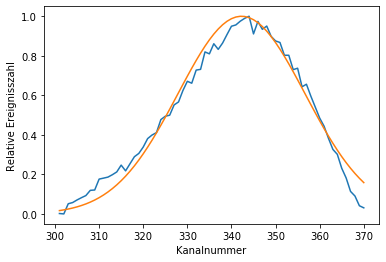

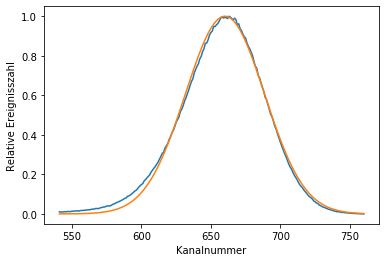

In [10]:
p_am_1, d_p_am_1 = calibrate_peak(cal_am, 300, 370)
p_am_2, d_p_am_2 = calibrate_peak(cal_am, 540, 760)

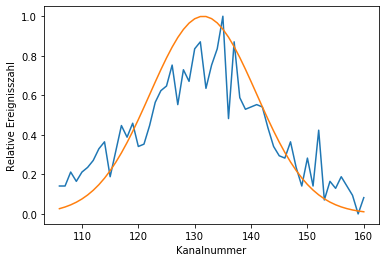

In [11]:
p_eu_1, d_p_eu_1 = calibrate_peak(cal_eu, 105, 160)

In [12]:
peaks, d_peaks = [p_ba_1, p_ba_2, p_am_1, p_am_2, p_eu_1], [d_p_ba_1, d_p_ba_2, d_p_am_1, d_p_am_2, d_p_eu_1]

In [13]:
peaks, d_peaks = [p_cs_1, p_ba_1, p_ba_2, p_ba_3, p_am_1, p_am_2, p_eu_1], \
    [d_p_cs_1, d_p_ba_1, d_p_ba_2, d_p_ba_3, d_p_am_1, d_p_am_2, d_p_eu_1]

In [14]:
def Ef(x, a, b):
    return (x - a)/b
    

In [15]:
pe, d_pe = curve_fit(Ef, energies, peaks, sigma=d_peaks, absolute_sigma=True)
d_pe =  np.sqrt(np.diag(d_pe))

array([0.17750116, 0.00041067])

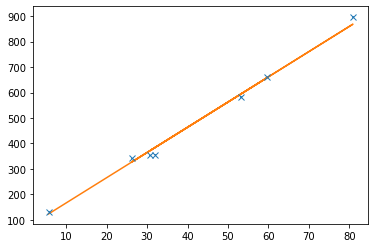

In [16]:
plt.cla()
plt.errorbar(energies, peaks, linestyle='None', marker='x', yerr=d_peaks)
plt.plot(energies, Ef(np.array(energies), *pe))
d_pe

In [17]:
EE = SecondaryValue('b*K+a', defaults=dict(a=(pe[0], d_pe[0]), b=(pe[1], d_pe[1])))

In [18]:
am_2 = load_spectrum('../messung/2/2_90.dat', absolute=True)
am_2_0 = load_spectrum('../messung/2/3_90_0.dat', absolute=True)

91.0

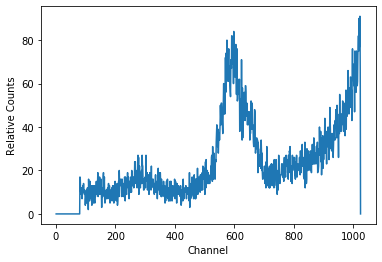

In [19]:
plot_spec(am_2)
am_2.max()

In [21]:
t = (1200 + 1165.2)/2
N = am_2[530:780].sum()/t
N0 = am_2_0[530:780].sum()/t


In [22]:
tt = t_opt(N_g=N, N_0=N0, prec=([.05, .03],))
d_tt = d_t_opt(N_g=N, N_0=N0, prec=([.05, .03],), t=t)

In [23]:
tt/60


array([ 7.84406946, 21.78908184])

In [24]:
p_am_2

660.1058575029247

In [25]:
N0

4.683747674615255

In [26]:
d_tt/60

array([1.5808687 , 4.39130194])

In [27]:
am_2_0[530:780].sum()

5539.0

# E(mu)

In [28]:
deg_angles = np.array([30, 45, 60, 75, 90, 105, 120])
angles = np.array([30, 45, 60, 75, 90, 105, 120])*np.pi/180
e_ref, deps = E(E_in=e_am_2, theta=(angles,), retdeps=True)
mus = deps['mu'][0]

In [29]:
deps

{'mu': ((array([ 8.66025404e-01,  7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
           6.12323400e-17, -2.58819045e-01, -5.00000000e-01]),), {}),
 'kappa': ((0.116518634725179,), {})}

ValueError: x and y must have same first dimension, but have shapes (1, 7) and (7,)

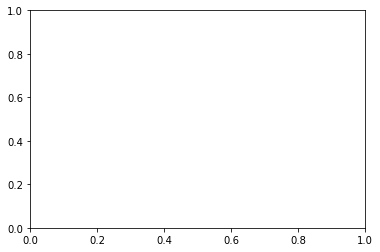

ValueError: x and y must have same first dimension, but have shapes (1, 7) and (7,)

In [30]:
plt.clf()
plt.plot(mus, e_ref)

In [31]:
e_am_1*1e3

26344.6

In [32]:
e_ref

array([58.62572101, 57.57597488, 56.26305294, 54.80763619, 53.32727833,
       51.92478644, 50.68268424])

In [33]:
a_30 = load_spectrum('../messung/angles/4_30.SPC.dat', absolute=True)
a_30_0 = load_spectrum('../messung/angles/4_30_null.SPC.dat', absolute=True)

(643.0603545435793, 2.5910658810602545)

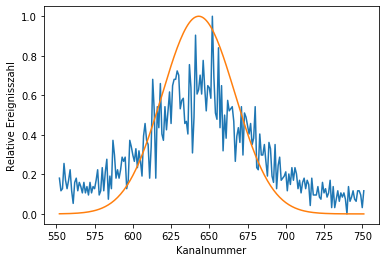

In [34]:
find_peak(a_30, a_30_0, [450, 800], 100)

In [35]:
angle_specs = np.array([[load_spectrum(f'../messung/angles/4_{i}.SPC.dat', absolute=True) for i in deg_angles], [load_spectrum(f'../messung/angles/4_{i}_null.SPC.dat', absolute=True) for i in deg_angles]])

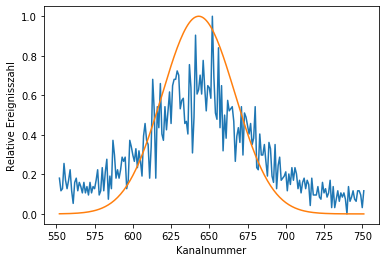

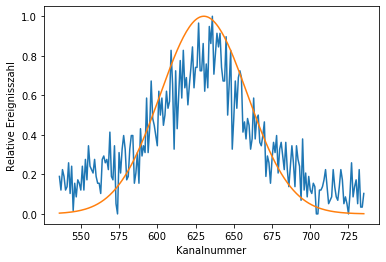

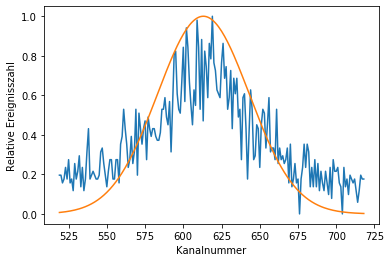

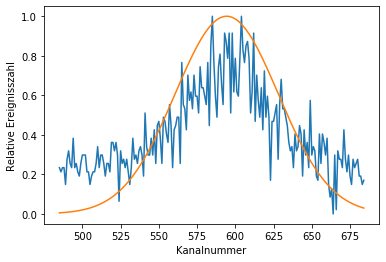

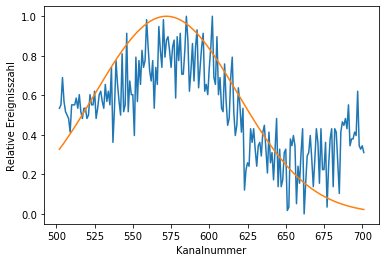

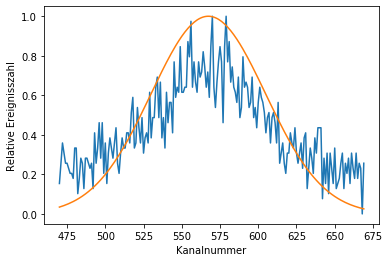

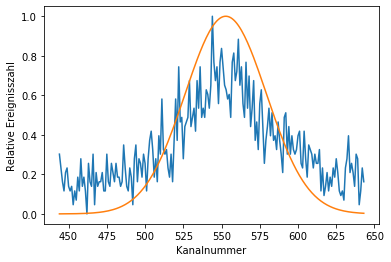

In [36]:
peaks = np.array([np.array(find_peak(angle_specs[0][i], angle_specs[1][i], [450, 800], 100)) for i in range(angle_specs.shape[1])])

In [37]:
angle_energies = peaks

In [38]:
angle_energies = EE(K=(peaks[:,0],))

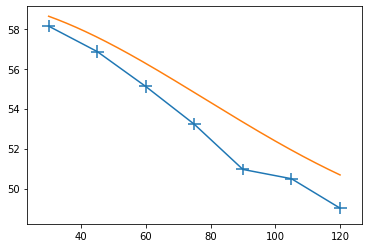

In [39]:
plt.clf()
plt.errorbar(deg_angles, angle_energies[0], xerr=2, yerr=angle_energies[1])
smooth = np.linspace(angles[0], angles[-1], 1000)
plt.plot(smooth*180/np.pi,E(E_in=e_am_2, theta=[smooth,1])[0])

In [40]:
peaks[:,0]

array([643.06035454, 630.4434801 , 613.11525173, 594.36455571,
       571.97053254, 567.36181374, 552.76412553])

In [41]:
angle_energies


(array([58.13084619, 56.85773153, 55.10921436, 53.21716208, 50.9574773 ,
        50.49243126, 49.01944118]),
 array([0.31819267, 0.31390575, 0.30806283, 0.30180186, 0.29441381,
        0.29290604, 0.28816031]))

In [42]:
E(E_in=e_am_2, theta=angles[6])

50.68268424189124

In [43]:
E(E_in=e_am_2, theta=angles[6])

50.68268424189124

In [44]:
E(E_in=e_am_2, theta=(np.array([1,2]),2/180*np.pi))

(array([56.51383007, 51.10773983]), array([0.18358449, 0.16224326]))

In [45]:
d_pe


array([0.17750116, 0.00041067])